In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

In [5]:
with open('results.pkl','r') as pickleFile:
    results = pickle.load(pickleFile)

IOError: [Errno 2] No such file or directory: 'results.pkl'

In [4]:
results['Green']

{0: (0.11545272696813129, 0.0003187904271785761),
 1: (0.11530967296547308, 0.00021730259956978827),
 2: (0.11529550283149809, 0.00035278133457088817),
 3: (0.11534821416654319, 0.0003000996890024629),
 4: (0.11533166907284333, 0.00022087667856292596),
 5: (0.11531088082851802, 0.00025998602079610705),
 6: (0.11538763430714644, 0.00031266874471178372)}

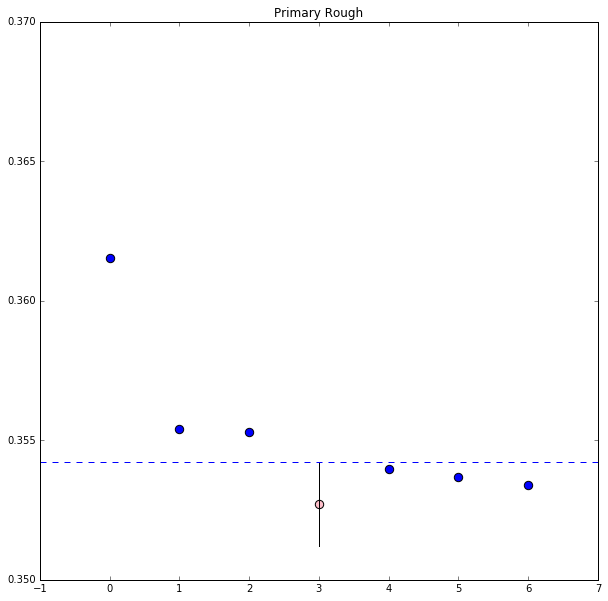

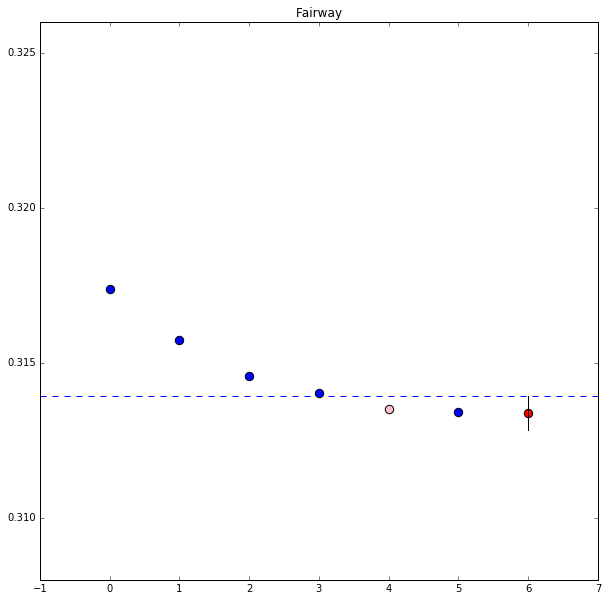

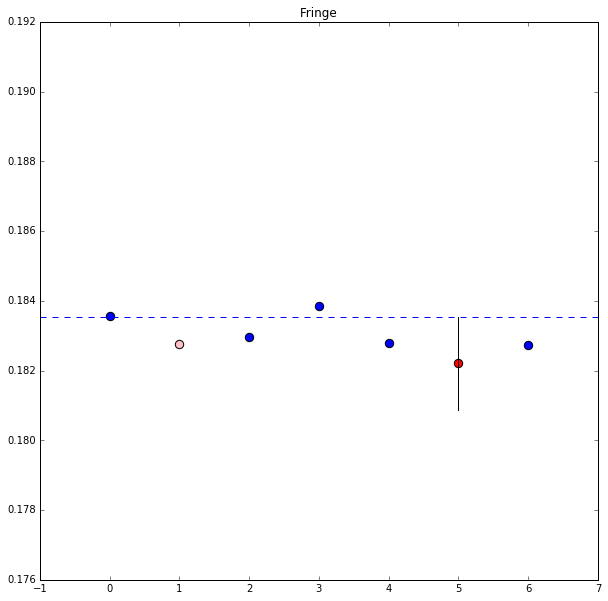

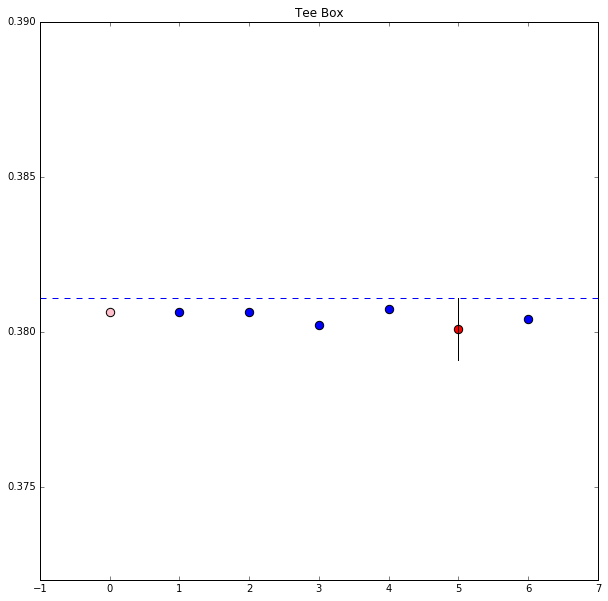

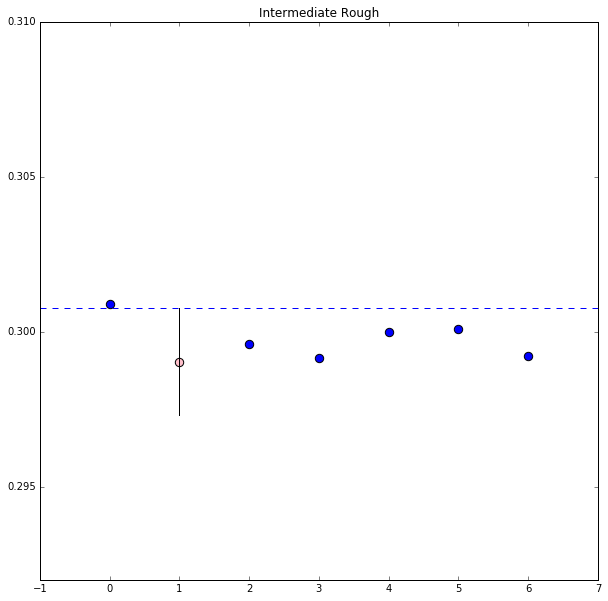

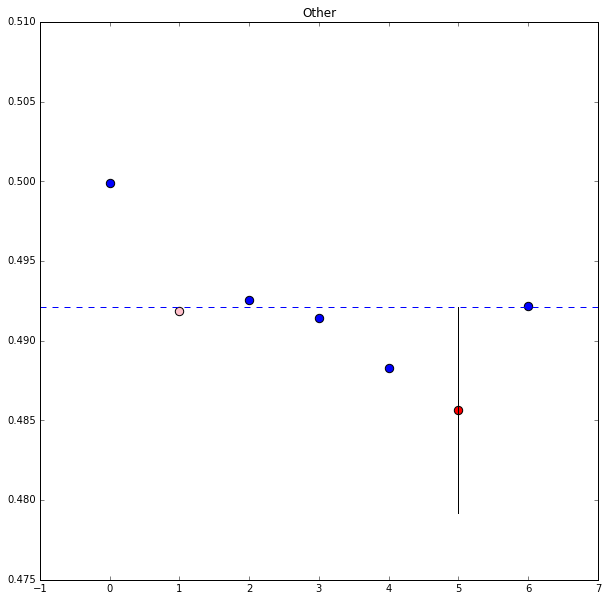

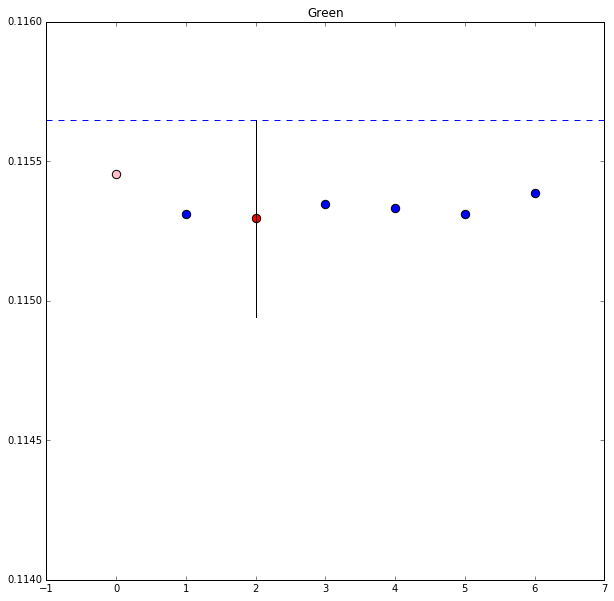

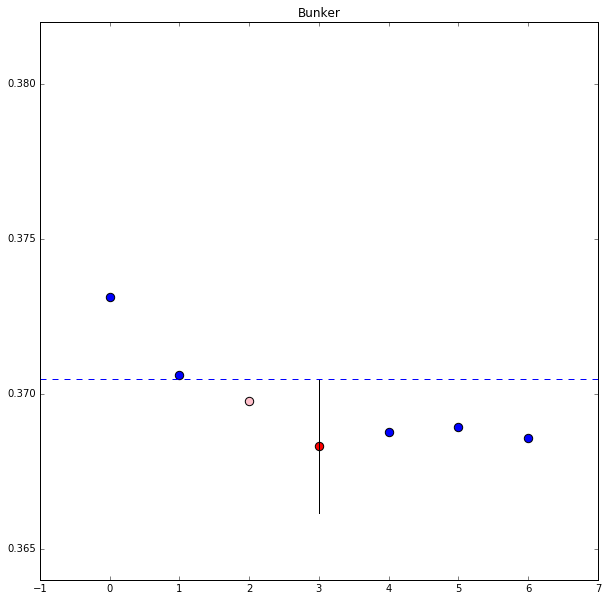

In [44]:
for cat in results:
    plt.figure(figsize=(10,10))
    min_u = sorted(results[cat],key=results[cat].get)[0]
    for u in results[cat]:
        mean,std = results[cat][u]
        if u==min_u:
            if u==min(u for u in results[cat] if results[cat][u][0]<=results[cat][min_u][0]+results[cat][min_u][1]):
                color = 'pink'
            else:
                color = 'red'
        elif u==min(u for u in results[cat] if results[cat][u][0]<=results[cat][min_u][0]+results[cat][min_u][1]):
            color = 'pink'
        else:
            color = 'blue'
        plt.scatter([u],[mean],c=color,s=70)
    plt.plot((min_u, min_u), (results[cat][min_u][0]-results[cat][min_u][1], results[cat][min_u][0]+results[cat][min_u][1]), 'k-')
    plt.axhline(y=results[cat][min_u][0]+results[cat][min_u][1],ls='--')
    plt.title(cat)
    if cat=='Green':
        plt.ylim(.114,.116)
    plt.show()

In [2]:
5/(0.115301119917 + 0.11547213383 + 0.115522624577 + 0.114833938374 + 0.115569876966 )

8.670023679452703

In [2]:
1/2.834

0.3528581510232886

In [2]:
from scipy.stats import norm

In [3]:
def my_norm(x,BETA):
    return norm.pdf(x,0,BETA)/norm.pdf(0,0,BETA)

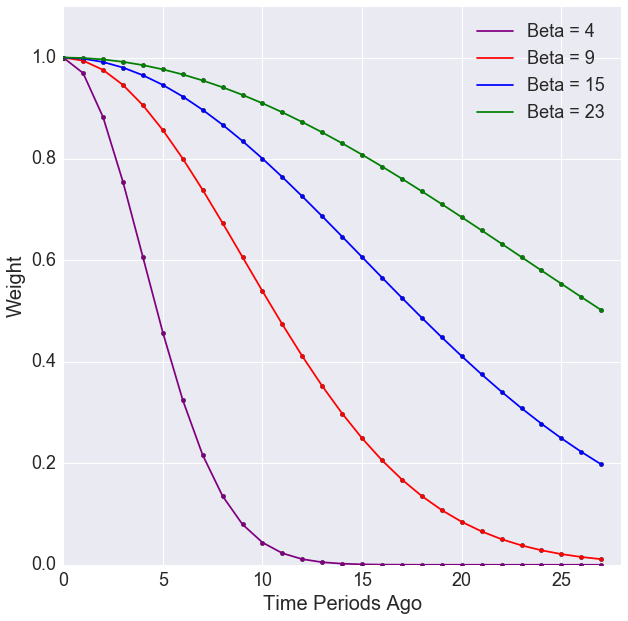

In [5]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
color_map = {4:'purple',9:'red',15:'blue',23:'green'}
for beta in [4,9,15,23]:
    plt.plot(np.arange(0,28),my_norm(np.arange(0,28),beta),label='Beta = '+str(beta),c=color_map[beta]);
    plt.scatter(np.arange(0,28),my_norm(np.arange(0,28),beta),c=color_map[beta]);
plt.legend(loc=1,prop={'size':18})
plt.xlim(0,28)
plt.ylim(0,1.1);
plt.setp(ax.get_xticklabels(), fontsize=18);
plt.setp(ax.get_yticklabels(), fontsize=18);
ax.set_xlabel('Time Periods Ago',fontsize=20);
ax.set_ylabel('Weight',fontsize=20);
plt.savefig('./../Plots/weights.png',dpi=100)

In [6]:
mat = pd.read_csv('mat.csv')

In [12]:
mat.columns = [col.split('_')[0] for col in mat.columns]

In [23]:
np.cov(mat.values,rowvar=False)[0:5,0:5]

array([[ 0.08299797,  0.0036747 ,  0.00588541,  0.00637374,  0.0077956 ],
       [ 0.0036747 ,  0.08333322,  0.02722604,  0.01007773, -0.00327978],
       [ 0.00588541,  0.02722604,  0.08333322,  0.0171852 , -0.00315374],
       [ 0.00637374,  0.01007773,  0.0171852 ,  0.08333322,  0.01358704],
       [ 0.0077956 , -0.00327978, -0.00315374,  0.01358704,  0.08333322]])

In [25]:
np.corrcoef(mat.values,rowvar=False)[0:5,0:5]

array([[ 1.        ,  0.04418538,  0.07076755,  0.07663926,  0.09373606],
       [ 0.04418538,  1.        ,  0.32671295,  0.12093298, -0.03935737],
       [ 0.07076755,  0.32671295,  1.        ,  0.20622273, -0.03784491],
       [ 0.07663926,  0.12093298,  0.20622273,  1.        ,  0.16304472],
       [ 0.09373606, -0.03935737, -0.03784491,  0.16304472,  1.        ]])

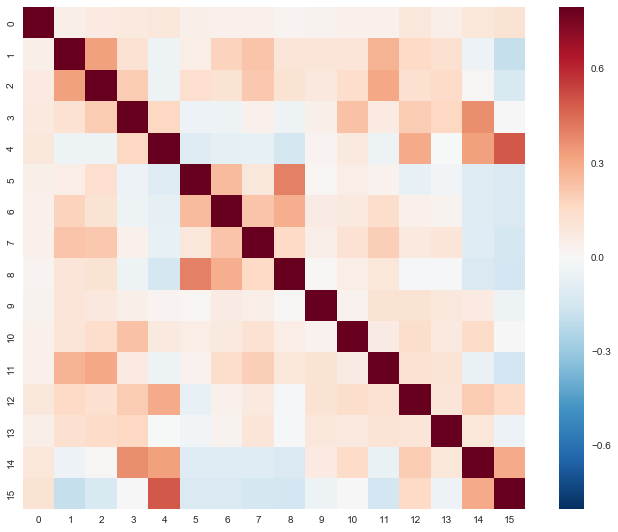

In [24]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(np.corrcoef(mat.values,rowvar=False), vmax=.8, square=True)